In [63]:
%matplotlib inline
from ipywidgets import interact, fixed,interactive
from ipywidgets.widgets import *
from IPython.display import display
from matplotlib import pyplot as plt
from ConsModel import *

### 年齢

In [64]:
def age(Age_0,Age_r):
    None
AGE = interactive(age, 
                  Age_0=IntSlider(value=33,min=23,max=100,step=1,description=u'現在年齢'), 
                  Age_r=IntSlider(value=50,min=50,max=80,step=1,description=u'残存余命'),
                 )
display(AGE)

### 結婚

In [65]:
def mar(Age_m,Age_d):
    None
MAR = interactive(mar, 
                  Age_m=IntSlider(value=28,min=0,max=100,step=1,description=u'結婚時の本人年齢（予定なしは0）'),
                  Age_d=IntSlider(value=0,min=0,max=30,step=1,description=u'配偶者との年齢差（本人－配偶者）')
                 )
display(MAR)

### 子ども

In [66]:
def cld(N_c):
    None
CLD = interactive(cld,N_c=IntSlider(value=2,min=0,max=5,step=1,description=u'子どもの数（予定含む）'))
display(CLD)

クリックして出生時の本人年齢を選択

In [67]:
def clda(submit):
    if submit:
        rlt=[]
        for i in range(1,CLD.kwargs.values()[0]+1):
            exec("def cldA_"+str(i)+"(Age_c_"+str(i)+"): None")
            exec("CLDA_"+str(i)+" = interactive(cldA_"+str(i)+", Age_c_"+str(i)+"=IntSlider(value=28,min=18,max=60,step=1,description=u'第"+str(i)+u"子'))")    
            exec("display(CLDA_"+str(i)+")")
            exec("rlt.append(CLDA_"+str(i)+")")
        return rlt
goclda=interactive(clda,submit=ToggleButton(value=False,description=u'クリック'))
display(goclda)

クリックして子どもの私立通学の有無を選択（複数選択可、ctrl+クリックで解除）

In [68]:
def pris(submit):
    if submit:
        rlt=[]
        for i in range(1,CLD.kwargs.values()[0]+1):
            exec("def pris_"+str(i)+"(x):pass")
            exec("PRIS_"+str(i)+"=interactive(pris_"+str(i)+", x=SelectMultiple(options=[u'小', u'中', u'高', u'大'], description=u'第"+str(i)+u"子'))")
            exec("display(PRIS_"+str(i)+")")
            exec("rlt.append(PRIS_"+str(i)+")")
        return rlt
gopris=interactive(pris,submit=ToggleButton(value=False,description=u'クリック'))
display(gopris)

### 支出

In [69]:
def cons(C_c0,D_n0):
    None
CONS = interactive(cons, 
                  C_c0=IntSlider(value=30,min=5,max=200,step=1,description=u'子育て費用と家賃を除く月間支出（万円）'),
                  D_n0=IntSlider(value=0,min=0,max=10000,step=10,description=u'住宅以外のローン現在残高（万円）')
                 )
display(CONS)

### 住宅

In [70]:
def hou(Age_h, Rent_h, F_h0, D_h0):
    None
HOU = interactive(hou, 
                  Age_h=IntSlider(value=37,min=0,max=100,step=1,description=u'住宅購入時の本人年齢（予定なしは0）'),
                  Rent_h=IntSlider(value=15,min=0,max=200,step=1,description=u'居住用家賃（月間、万円）'),
                  F_h0=IntSlider(value=4000,min=0,max=30000,step=100,description=u'住宅（保有or予定）・現在評価額（万円）'),
                  D_h0=IntSlider(value=0,min=0,max=30000,step=100,description=u'住宅ローン現在高（万円）')                                    
                 )
display(HOU)

### 仕事

In [75]:
def Workage(Age_str,Age_ret):
    None
WORKAGE = interactive(Workage, 
                  Age_str=IntSlider(value=24,min=18,max=30,step=1,description=u'就職開始年齢'),
                  Age_ret=IntSlider(value=60,min=55,max=70,step=1,description=u'退職金　受取年齢')
                 )
display(WORKAGE)


def wage(W_m0,W_s0):
    None
WAGE = interactive(wage, 
                  W_m0=IntSlider(value=500,min=0,max=4000,step=50,description=u'現役時代の平均年収（本人、万円）'),
                  W_s0=IntSlider(value=500,min=0,max=4000,step=50,description=u'同（配偶者、万円）')
                 )
display(WAGE)

### 資産運用

In [72]:
def asset(A_d0, A_r0, s_r):
    None
ASSET = interactive(asset, 
                  A_d0=IntSlider(value=300,min=0,max=10000,step=50,description=u'現在の預金残高（万円）'),
                  A_r0=IntSlider(value=50,min=0,max=10000,step=50,description=u'現在のリスク資産残高（万円）'),
                  s_r=FloatSlider(value=0.2,min=0,max=1.0,step=0.05,description=u'新規貯蓄の預金・リスク資産配分')                    
                 )
display(ASSET)

In [77]:
def f(submit):
    if submit:
        # Child Ages
        Age_c=[]
        for i in range(CLD.kwargs.values()[0]):
            try:
                Age_c.append(goclda.result[i].kwargs.values()[0])
                CLDA = {'Age_c':Age_c}
            except:
                print u"子ども出生時の本人年齢を入力して下さい"
                CLDA={}
                break

        # Private schools
        goprisrlt=[]
        try:
            for i in range(CLD.kwargs.values()[0]):
                goprisrlt.append(gopris.result[i].kwargs.values()[0])
            schmap={u'小':0,u'中':1,u'高':2,u'大':3}
            psh = []
            for p in goprisrlt:
                for m in p:
                    ZERO = zeros(4)
                    ZERO[schmap[m]]=1
                    psh.append(list(ZERO.astype('i')))
            PSH = {'psh':psh}
        except:
            print u"私立通学の有無を入力して下さい"
            PSH = {}
        
        #　Other params
        dicts = [AGE.kwargs, MAR.kwargs, CLDA, PSH, CONS.kwargs, HOU.kwargs, WAGE.kwargs, ASSET.kwargs]
        pars = {k: v for dic in dicts for k, v in dic.items()}

        # Run
        MOD.run(**pars)

        MOD[["NW","A","D"]].plot()

### あなたの純資産の将来推計（インフレ率+2%前提）

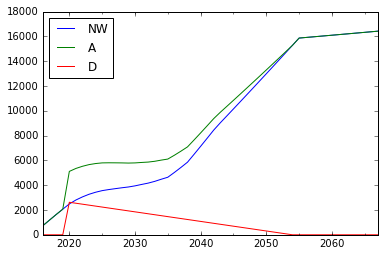

In [78]:
go = interact(f,submit=ToggleButton(value=False, description=u'計算する',button_style="success")) 

### あなたの純資産の将来推計（インフレ率0%前提）

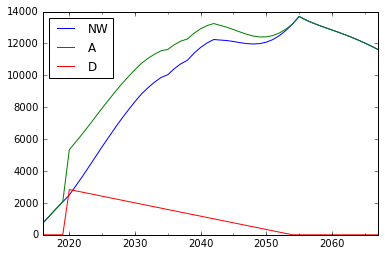

In [79]:
def fi(submit):
    if submit:
        # Child Ages
        Age_c=[]
        for i in range(CLD.kwargs.values()[0]):
            try:
                Age_c.append(goclda.result[i].kwargs.values()[0])
                CLDA = {'Age_c':Age_c}
            except:
                print u"子ども出生時の本人年齢を入力して下さい"
                CLDA={}
                break

        # Private schools
        goprisrlt=[]
        try:
            for i in range(CLD.kwargs.values()[0]):
                goprisrlt.append(gopris.result[i].kwargs.values()[0])
            schmap={u'小':0,u'中':1,u'高':2,u'大':3}
            psh = []
            for p in goprisrlt:
                for m in p:
                    ZERO = zeros(4)
                    ZERO[schmap[m]]=1
                    psh.append(list(ZERO.astype('i')))
            PSH = {'psh':psh}
        except:
            print u"私立通学の有無を入力して下さい"
            PSH = {}
            
        # Inflation
        INF = {
            "pi_w" : 0.01, #マクロ賃金上昇率（年率）
            "pi_p" : 0.02, #物価インフレ率
            "pi_h" : 0.02, #家賃インフレ率（年率）
            "pi_r" : 0.00, #実質リスク資産価格伸び率

            "i_d" : 0.005,   #預金利子率（年率）
            "i_r" : 0.015, #リスク資産（配当・分配金）利回り
            "i_h" : 0.03, #住宅ローン利子率（年率）
            "i_n" : 0.1, #無担保ローン利子率（年率）
            "i_f" : 0.005, #リスクフリー金利
        }
        #　Other params
        dicts = [AGE.kwargs, MAR.kwargs, CLDA, PSH, CONS.kwargs, HOU.kwargs, WAGE.kwargs, ASSET.kwargs, INF]
        pars = {k: v for dic in dicts for k, v in dic.items()}

        # Run
        MOD.run(**pars)

        MOD[["NW","A","D"]].plot()
        
go = interact(fi,submit=ToggleButton(value=False, description=u'計算する',button_style="success")) 